# 케라스 모델 완전 정복

In [2]:
import keras 
from tensorflow.keras import layers
from keras import Sequential

In [3]:
model=keras.Sequential([layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])

In [76]:
model.build(input_shape=(None,3)) # 인풋을 3개넣음 

In [77]:
model.weights # 3행 64열 +64 + 64*10+ 10

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.03547117, -0.28570142, -0.19022843, -0.08068509,  0.24469328,
          0.14530918, -0.03066292,  0.2729991 ,  0.29905653, -0.03663284,
          0.25495028, -0.14815308,  0.07243699, -0.02474144,  0.19431058,
          0.11671355,  0.26555628, -0.07676812, -0.24377534,  0.18770218,
          0.14192075,  0.27225095, -0.24806595, -0.12336984, -0.20938915,
          0.00794512,  0.22464979,  0.02260372,  0.09634501, -0.28018677,
         -0.04208186, -0.08086133,  0.03901157,  0.14152962,  0.1316804 ,
          0.07935134, -0.10433492, -0.21948823,  0.05915281, -0.11264932,
         -0.23927444, -0.27352107, -0.0913322 ,  0.01581645, -0.22122312,
          0.2687208 ,  0.06786552, -0.27041495, -0.098482  , -0.2555679 ,
          0.00418139, -0.13177207, -0.25077367,  0.01200157, -0.13274446,
         -0.04105109,  0.02092171, -0.21761864,  0.01727828, -0.05338785,
          0.25756586,  0.15882981,  0.1583638

In [78]:
model.summary() # 64는 숨겨친 층의 개수 none은 몇개가 들어올지 모름  출력10게 나옴 
# 64*3= 192 +1*64 = 256 바이어스가 하나 들어감 
# 65*10 --바이어스 하나 처움 파람스는 가중치이다. 
# 도합 906개의 가중치를 가짐 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [79]:
model=keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [80]:
from keras.layers import Dense
model.add(Dense(64, activation="relu", name="my_first_layer")) # input이 1개라서 그럼  64*10+ 64
model.add(Dense(10, activation="softmax", name="my_last_layer")) # 65*10
model.summary()

ValueError: All layers added to a Sequential model should have unique names. Name "my_first_layer" is already the name of a layer in this model. Update the `name` argument to pass a unique name.

In [81]:
model=Sequential()
model.add(keras.Input(shape=(3, )))
model.add(Dense(64, activation="relu", name="my_first_layer")) # input이 1개라서 그럼  64*10+ 64
model.add(Dense(10, activation="softmax", name="my_last_layer")) # 65*10
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 함수형 API

In [82]:
# 함수형 api는 입력이 여러개 출력이 여러개 가능 
# 시퀀셜은 입력이 한개, 출력이 한개

In [86]:
inputs = keras.Input(shape=(3, )) # 피처가 3개들어오고 샘플개수는 상관없다.
f =Dense(64, activation="relu")(inputs) # input이 1개라서 그럼  64*10+ 64
outputs =Dense(10, activation="softmax")(f) # 65*10
model = keras.Model(inputs,outputs) # input의 x가 들어가야 함 

In [84]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [55]:
#pip install pydot

^C
Note: you may need to restart the kernel to use updated packages.


In [56]:
#pip install pydot graphviz

^C
Note: you may need to restart the kernel to use updated packages.


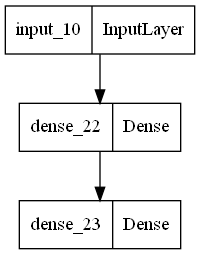

In [57]:
from keras.utils import plot_model
keras.utils.plot_model(model)

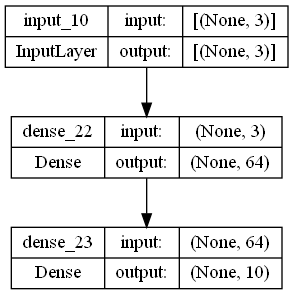

In [58]:
plot_model(model, show_shapes= True)

In [19]:
model.layers

In [20]:
model.layers[1].input

<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_4')>

In [21]:
model.layers[1].output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>

In [10]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_data, train_labels), (test_data, test_labels) =mnist.load_data()
train_data = train_data.reshape(60000, 28*28)
test_data = test_data.reshape(10000, 28*28)

train_labels= to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [11]:
model.compile(optimizers='RMSprop', loss='MSE')
model.fit(train_data, train_labels, epoch=10, batch_size=256)

TypeError: Invalid keyword argument(s) in `compile()`: ({'optimizers'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

## 다중입력 다중출력

In [1]:
from keras import layers
import keras

In [2]:
vocabulary_size = 10000 # 시퀀셜에 뭐쌓는 것 처럼 쌓음 
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])# 입력정의 
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features) # yes no 출력
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features) # 분류 출력

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [3]:
import numpy as np # 위의 시퀀셜한 것을 쓴다. 

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # 1280 ,10000
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1)) # 1280, 1
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))#1280, 4

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data]) 

40/40 [==============================] - 0s 4ms/step


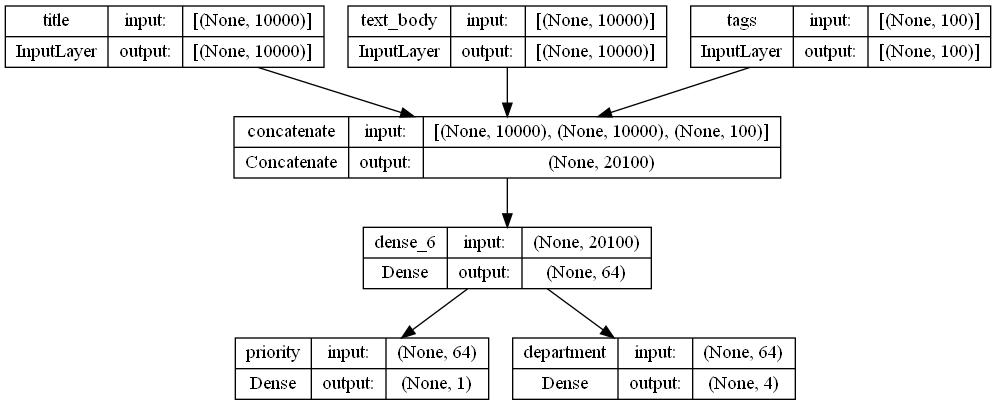

In [27]:
plot_model(model, show_shapes= True)

In [32]:
x = keras.Input(shape=(3, ))
y =Dense(64, activation="relu")(x) # input이 1개라서 그럼  64*10+ 64
y =Dense(10, activation="softmax")(y) # 65*10
model = keras.Model(x,y) # input의 x가 들어가야 함 
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_13 (Dense)            (None, 64)                256       
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [34]:
x = keras.Input(shape=(3, ))
y =Dense(64, activation="relu")(x)
y =Dense(10, activation="softmax")(x)  # input이 두군데 들어가서 아래것만 살아남음
model = keras.Model(x,y) 
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_18 (Dense)            (None, 10)                40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [35]:
x = keras.Input(shape=(3, )) # 인풋이 안먹음 
x =Dense(64, activation="relu")(x)
y =Dense(10, activation="softmax")(x)  # 두군데 들어가서 아래것만 살아남음
model = keras.Model(x,y) 
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [36]:
inputs = keras.Input(shape=(3, )) # 인풋이 먹음 
f =Dense(64, activation="relu")(inputs) # input이 1개라서 그럼  64*10+ 64
outputs =Dense(10, activation="softmax")(f) # 65*10
model = keras.Model(inputs,outputs) # input의 x가 들어가야 함 
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_21 (Dense)            (None, 64)                256       
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 밑바닥 부터 다시 구현

In [7]:
import tensorflow as tf

In [13]:
tf.Variable # 변수 만드는 것

tensorflow.python.ops.variables.Variable

In [14]:
a=tf.Variable(tf.zeros(shape=(10, )))
a.shape

TensorShape([10])

In [27]:
class NaiveDense:
    def __init__(self, input_size, output_size, activation): # 초기값으로 갖고 있음 
        self.activation = activation
        self.W =tf.Variable(tf.random.uniform(shape=(input_size, output_size), minval=0, maxval=0.1))
        self.b = tf.Variable(tf.zeros(shape=(output_size, )))
        
    def __call__(self,inputs): # 정방향전파 
        return self.activation(tf.matmul(inputs, self.W)+self.b)# matmul 행렬의 곱셈 one step training에서 가중치 업데이트 된것 씀 
    
    @property
    def weights(self):
        return [self.W, self.b] # 처음 가중치이다.

In [28]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers= layers # self는 만들어진 객체이름 naiveDense 2개 
        
    def __call__(self, inputs):
        x= inputs
        for layer in self.layers: # layers가 밑에 naiveDense 2개이다.
            x=layer(x) # 레이어를 돌면서 층을 두개 통과한다 .weight로 가중치를 불러올수 있다.
        return x 
    
    @property   # 메소드를 속성처럼 코딩할수 있게 해준다. 속성이에요 몇가지 기능을하게 함 len이라든지# @ <- annotation : 어노테이션, 애너테이션, 데코레이터 ,decorator
    def weights(self):
        weights =[]
        for layer in self.layers: 
            weights +=layer.weights # 뒤에 가중치 더한 것 추가
        return weights
    

    
#     def __len__(self):
#         return len(self.Weights)
        

In [29]:
b =NaiveDense(input_size=28*28, output_size=512, activation = tf.nn.relu)
b(10)

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:MatMul]

In [30]:
model=NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation = tf.nn.relu),
   NaiveDense(input_size=512, output_size=10, activation = tf.nn.softmax)
                ])



In [31]:
model.weights # 가중치를 불러온 모습

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.02733306, 0.07187628, 0.06152232, ..., 0.00737488, 0.00740362,
         0.01799923],
        [0.07872055, 0.04105444, 0.03207464, ..., 0.03355869, 0.09268755,
         0.00572829],
        [0.09860039, 0.02265686, 0.08688148, ..., 0.09668159, 0.02821158,
         0.09135003],
        ...,
        [0.00224903, 0.09995206, 0.06862459, ..., 0.03184724, 0.00882165,
         0.04583011],
        [0.01698284, 0.00748147, 0.08277766, ..., 0.02937065, 0.01416551,
         0.08041634],
        [0.02412868, 0.06801397, 0.03320024, ..., 0.01563323, 0.07424487,
         0.01977861]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

In [32]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

AttributeError: 'NaiveSequential' object has no attribute 'compile'

In [33]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index =0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batchs = math.ceil(len(images)/batch_size) # 128로 나눈 것에서 하나 더한 것 
        
    def next(self):
        images =self.images[self.index :self.index+self.batch_size] # 128로 계속감 
        labels =self.labels[self.index :self.index+self.batch_size]
        self.index += self.batch_size
        return images, labels

In [34]:
learning_rate= 0.001
def update_weights(gradients , weights): # 기울기는 아래 one step training에 있다.
    for g, w in zip(gradients, weights): # 기울기랑 가중치가 나온다. 묶여서  기울기에서 러닝레이트 곱한것
        w.assign_sub(g*learning_rate) # 빼준다. 기울기가 감소하는 것은 점점 아래로 가고 있다는 뜻이다.\
                                      # 수동으로 구동하는 방식이다.

In [35]:
from tensorflow.keras import optimizers
optimizers =optimizers.SGD(learning_rate=1e-3)
def update_weights(gradients , weights):
    optimizers.apply_gradients(zip(gradients, weights)) #가중치 없데이트 하는 것은 apply_gradients하는 것


In [39]:
def one_training_step(model, images_batch, labels_batch): # 이미지 배치는 아래에 나온다.
    with tf.GradientTape() as tape:
        predictions =model(images_batch) # 시퀀셜 , 즉 덴스 층이다.
        per_batch_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)# 분류해서 손실 구함
        average_loss = tf.reduce_mean(per_batch_losses)# 배치당 손실의 평균을 구함
    gradients = tape.gradient(average_loss, model.weights)  #손실함수 그래프가 만들어짐 # 이 기울기는 위에서 업데이트됨
    update_weights(gradients, model.weights) #위의 정의 내린것 
    return average_loss # 손실한 것이다. 

In [49]:
def f(x):
    return 3*x**2

In [50]:
h= 0.00001
def diff(x):
   return ( f(x+h) - f(x-h) ) / (2*h)   

In [51]:
diff(1)

5.999999999994897

In [40]:
def fit(model, images, labels, epochs, batch_size=128):
    for epochs_counter in range(epochs):
        print(f"{epochs_counter}번째 에포크")
        batch_generator = BatchGenerator(images, labels) #
        for batch_counter in range(batch_generator.num_batchs): # 최대 배치
            images_batch, labels_batch =batch_generator.next() # 처음 128 두번째 128로 batch가 들어감
            loss =one_training_step(model, images_batch, labels_batch)
            if batch_counter %100==0:
                print(f"{batch_counter}번째 배치 손실 : {loss:2f}")

In [41]:
from keras.datasets import mnist # 숫자 구별이다..

(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

train_images=train_images.reshape(60000, 28*28) 
train_images=train_images.astype("float32")/255
test_images=test_images.reshape(10000, 28*28) 
test_images=test_images.astype("float32")/255

fit(model, train_images, train_labels, epochs=10, batch_size=128)


0번째 에포크
0번째 배치 손실 : 0.628003
100번째 배치 손실 : 0.644153
200번째 배치 손실 : 0.559694
300번째 배치 손실 : 0.619475
400번째 배치 손실 : 0.694502
1번째 에포크
0번째 배치 손실 : 0.594844
100번째 배치 손실 : 0.606475
200번째 배치 손실 : 0.526901
300번째 배치 손실 : 0.588834
400번째 배치 손실 : 0.668227
2번째 에포크
0번째 배치 손실 : 0.567071
100번째 배치 손실 : 0.574533
200번째 배치 손실 : 0.499382
300번째 배치 손실 : 0.562872
400번째 배치 손실 : 0.646376
3번째 에포크
0번째 배치 손실 : 0.543442
100번째 배치 손실 : 0.547143
200번째 배치 손실 : 0.476006
300번째 배치 손실 : 0.540596
400번째 배치 손실 : 0.627936
4번째 에포크
0번째 배치 손실 : 0.523064
100번째 배치 손실 : 0.523420
200번째 배치 손실 : 0.455938
300번째 배치 손실 : 0.521275
400번째 배치 손실 : 0.612171
5번째 에포크
0번째 배치 손실 : 0.505286
100번째 배치 손실 : 0.502686
200번째 배치 손실 : 0.438546
300번째 배치 손실 : 0.504362
400번째 배치 손실 : 0.598533
6번째 에포크
0번째 배치 손실 : 0.489620
100번째 배치 손실 : 0.484418
200번째 배치 손실 : 0.423345
300번째 배치 손실 : 0.489433
400번째 배치 손실 : 0.586602
7번째 에포크
0번째 배치 손실 : 0.475697
100번째 배치 손실 : 0.468206
200번째 배치 손실 : 0.409959
300번째 배치 손실 : 0.476164
400번째 배치 손실 : 0.576062
8번째 에포크
0번째 배치 손실 : 0.463229
100

In [43]:
import numpy as np
predictions = model(test_images)
predictions= predictions.numpy()
predictions_labels=np.argmax(predictions, axis=1)
matchs= predictions_labels==test_labels
print(f"정확도: {matchs.mean():.2f}")

정확도: 0.86


In [46]:
predictions= predictions.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:
최종적으로 아웃풋은 무엇일까요? W, b, grad?

# assert란?

In [53]:
model.weights

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.02152106, 0.05621797, 0.08557785, ..., 0.03730115, 0.03895609,
         0.02670261],
        [0.09711033, 0.07275806, 0.01541866, ..., 0.00301406, 0.00939682,
         0.06961242],
        [0.0907691 , 0.00259045, 0.06203457, ..., 0.01208957, 0.04745017,
         0.00870152],
        ...,
        [0.04087188, 0.00158097, 0.04747703, ..., 0.08890098, 0.07597794,
         0.04695396],
        [0.02071707, 0.00896482, 0.08411171, ..., 0.0508314 , 0.0593798 ,
         0.08858289],
        [0.02028164, 0.07641822, 0.05916404, ..., 0.03987962, 0.05512508,
         0.08841991]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

In [54]:
assert len(model.weights)==4 # assert는 뒤에가 맞는지 확인함 
# 각 레이어 마다 w,b 한개씩 총 2개니 4개 

In [ ]:
if len(model.weights)==4 :
    pass
else:
    print('False')

In [22]:
len(model.weights)

4

# @property

In [ ]:
model.weights.__len__() # 스페셜 메소드 정의 됨 

4

In [21]:
dir(model.weights) #쓸수있는 함수 나옴

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

# __call__() 역할

In [68]:
class Test: # 호출 가능한 객체로 만들어줌..
    def __call__(self, num):
        if num ==1:
            print("Hello")
        else:
            raise
test = Test() 
test(1) #함수 # class를 함수로 만들고  call안에 있는 것을 사용하는 것이다....

Hello


In [69]:
Test()(1) # call은 받아들임 #
# 기본 내장함수를 만드는 느낌이다. 
# 다른 것은 self.red()= red인데 call은 바로간다.

Hello


In [70]:
class A:
    def __init__(self):
        print('init')
    def __call__(self):
        print('call')
    def myfunc(self):
        print('my')

a = A()
a()
a.myfunc()

init
call
my


# 함수형으로 숫자

In [32]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras import Sequential # 대문자는 class다.

(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

train_images=train_images.reshape(60000, 28*28) 
train_images=train_images/255.0
test_images=test_images.reshape(10000, 28*28) 
test_images=test_images/255.0     

model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc')
model.fit(train_images, train_labels, epochs=5, batch_size=64) 

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2220 - acc: 0.9350
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0929 - acc: 0.9724
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0630 - acc: 0.9811
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0468 - acc: 0.9859
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0352 - acc: 0.9900


In [34]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0773 - acc: 0.9780


[0.07732157409191132, 0.9779999852180481]

In [65]:
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

train_images=train_images.reshape(60000, 28*28) 
train_images=train_images/255.0
test_images=test_images.reshape(10000, 28*28) 
test_images=test_images/255.0     

inputs = keras.Input(shape=(784, )) # 인풋이 먹음 
f =Dense(512, activation="relu")(inputs) # input이 1개라서 그럼  64*10+ 64
outputs =Dense(10, activation="softmax")(f) # 65*10
model = keras.Model(inputs,outputs) # input의 x가 들어가야 함 
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc')
model.fit(train_images, train_labels, epochs=5, batch_size=128)
model.evaluate(test_images, test_labels)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2583 - acc: 0.9247
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1053 - acc: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0693 - acc: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0508 - acc: 0.9845
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0827 - acc: 0.9733


[0.08269445598125458, 0.9732999801635742]

In [66]:
model.summary() #몇개가 들어와도 상관 없음 ..

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_29 (Dense)            (None, 512)               401920    
                                                                 
 dense_30 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# 합성곱 신경망

In [ ]:
합성곱 연산은 특성맵 feature map이라고 불리는 rgb3ckdnjsdlehlsek. 
한번하면 색이아닌 필터를 의미하게 된다. 
합성곱 커널이나 필터나 같다.

In [63]:
model.summary()import keras
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

train_images=train_images.reshape(60000, 28,28,1) 
train_images=train_images/255.0
test_images=test_images.reshape(10000, 28,28,1) 
test_images=test_images/255.0     

inputs = keras.Input(shape=(28, 28, 1)) # 흑백은 1이다. 

x =Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) # input이 1개라서 그럼  64*10+ 64
x= MaxPooling2D(pool_size=2)(x)
x =Conv2D(filters=64, kernel_size=3, activation="relu")(x) # input이 1개라서 그럼  64*10+ 64
x= MaxPooling2D(pool_size=2)(x)
x =Conv2D(filters=128, kernel_size=3, activation="relu")(x) # input이 1개라서 그럼  64*10+ 64
x= Flatten()(x)

outputs =Dense(10, activation="softmax")(x) # 65*10

model = keras.Model(inputs=inputs, outputs=outputs) # input의 x가 들어가야 함 
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc')
model.fit(train_images, train_labels, epochs=5, batch_size=128)
model.evaluate(test_images, test_labels)

Epoch 1/5
469/469 [==============================] - 15s 31ms/step - loss: 0.2047 - acc: 0.9373
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0492 - acc: 0.9848
Epoch 3/5
469/469 [==============================] - 15s 31ms/step - loss: 0.0341 - acc: 0.9896
Epoch 4/5
469/469 [==============================] - 15s 31ms/step - loss: 0.0254 - acc: 0.9921
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0237 - acc: 0.9930


[0.02365841157734394, 0.9929999709129333]

In [64]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 128)         738

In [ ]:
# 이미지 -> 숫자배열.....784
# 이미지 -> 이미지 숫자(28,28,1) 사진은 사진으로 처리 흑백은 1이다.  >> 숫자

# DNN >> 1
# CNN >> DNN >>1 


첫번째 인자(units): 출력 뉴런의 수를 설정합니다.
input_dim : 입력 뉴련의 수를 설정합니다.
kernel_initializer : 가중치를 초기화하는 방법을 설정합니다.
uniform : 균일 분포
normal : 가우시안 분포
activation : 활성화함수를 설정합니다.
linear : 디폴트 값으로 입력값과 가중치로 계산된 결과 값이 그대로 출력으로 나옵니다
sigmoid : 시그모이드 함수로 이진분류에서 출력층에 주로 쓰입니다
softmax : 소프드맥스 함수로 다중클래스 분류문제에서 출력층에 주로 쓰입니다.
relu: Rectified Linear Unit 함수로 은닉층에서 주로 쓰입니다.



퍼셉트론(Perceptron)은 인공 신경망(Aritificial Neural Network, ANN)의
구성 요소(unit)로서 다수의 값을 입력받아 하나의 값으로 출력하는 알고리즘입니다. 
Perceptron은 perception과 neuron의 합성어이며 인공 뉴런이라고도 부릅니다.
즉, 퍼셉트론은 생물학적인 신경계(Neual Network)의 기본 단위인 신경세포(=뉴런)의
동작 과정을 통계학적으로 모델링한 알고리즘입니다.
생물학 관점에서의 뉴런과 컴퓨터사이언스 관점에서 퍼셉트론의 역할과 동작 과정을 알아봅니다.
퍼셉트론은 아래 그림 3과 같이 도식화했습니다.
퍼셉트론은 뉴런이 다른 뉴런으로부터 신호를 입력받듯 다수의 값 을 입력받고,
입력된 값마다 가중치()를 곱합니다. 여기서 가중치는 생물학 뉴런에서 뉴런 간 
시냅스를 통한 결합의 세기와 같은 역할이며 가중치가 클수록 입력값이 중요하다는 것을 의미합니다. 
입력값으로써  외에도 편향(bias, )은 딥러닝 모델 최적화의 중요 변수 중 하나입니다.
일반적으로 입력값을 로 고정하고 편향 를 곱한 변수로 표현합니다. 입력값과 가중치의 곱,
편향은 퍼셉트론으로 전달됩니다. 퍼셉트론은 입력받은 값을 모두 합산하는데, 합산된 결괏값을 
가중합이라 부릅니다.
퍼셉트론의 종류는 입력층(Input Layer)과 출력층(Output Layer) 사이에 은닉층(Hidden Layer)의 
존재 여부에 따라 단층(Single-Layer) 퍼셉트론과 다층(Multi-Layer) 퍼셉트론으로 나뉩니다. 
각각에 대해 알아봅니다.

3. 퍼셉트론 학습 방법
x는 입력값, b는 편향, w는 가중치, y는 출력값입니다. 출력값 를 수식화하면 다음과 같이 나타낼 수 있습니다
여기서 입력값  x자체는 변경하지 않고 2가지 클래스를 잘 분류하는 기준선을 찾는 방법은 크게 2가지가 있습니다.
1) 편향() 조정
첫 번째 방법은 상수값 편향()을 조정하는 것입니다. 편향은 직선의 절편을 의미하기 때문에, 편향 값을 조정함으로써 직선 자체를 이동시킬 수 있습니다.

2) 가중치() 조정
두 번째 방법은 가중치()를 조정하는 것입니다. 가중치를 쉽게 생각해서 직선의 기울기라 생각하시면 됩니다. 
조정한 가중치는 아래와 같은 수식에 따라 산출됩니다.


(1) : Time Step
는 시간 순서를 구분하기 위한 값입니다. 즉, 은 의 다음 Time Step을 의미합니다.

4) : 학습률
는 '에타(eta)'라 읽고 학습률(Learning Rate)을 의미합니다. 
학습률은 Time Step마다 정답과 모델의 예측값 간의 차이를 어떤 비율만큼 고려하여 
가중치를 업데이트할지 결정하며, 0과 1사이의 값을 갖습니다. 즉, 학습률이 클수록 
ime Step마다 가중치가 많이 업데이트되므로 학습 속도가 빠릅니다. 하지만, 학습률이 
크면 가중치를 미세하게 조정하진 못하기 때문에 최적의 가중치를 찾는 데 어려울 수 있습니다. 
학습률은 하이퍼파라미터(hyper-parameter)로 사용자가 직접 지정해야 하는 값이므로,
어떤 값을 모델 학습에 사용하느냐에 따라 모델 성능이 좌지우지됩니다.

퍼셉트론은 아래와 같은 절차로 최적의 직선을 찾아나갑니다.

1) 좌표평면에 임의의 직선을 긋습니다.
2) 좌표평면에 데이터를 하나씩 입력합니다.
3) 입력값에 따른 모델의 예측값과 정답을 비교하여 틀린 경우 직선을 다시 긋습니다.
4) 모든 학습용 데이터에 대해 2~3) 과정을 반복합니다.

1.  활성화 함수의 개념
활성화 함수(Activation Function)란 퍼셉트론(Perceptron)의 출력값을 결정하는 
비선형(non-linear) 함수입니다. 즉, 활성화 함수는 퍼셉트론에서 입력값의 총합을 출력할지 말지 결정하고, 
출력한다면 어떤 값으로 변환하여 출력할지 결정하는 함수입니다. 퍼셉트론에 대한 자세한
내용은 이곳을 참고해 주세요.
아래 그림 1에 노란색으로 색칠한 부분이 퍼셉트론의 활성화 함수 부분입니다. 
2.1.  Sign 함수
위의 퍼셉트론에서는 Sign 함수를 활성화 함수로써 활용하였습니다(그림 2 참고).
즉, Sign 함수의 활성화 함수는 퍼셉트론 내 입력값의 총합이0 보다 작을 경우 -1을 출력하고,
반대로 0보다 클 경우 1을 출력하는 역할을 합니다. 
이처럼 활성화 함수는 비선형 함수입니다.
Sign 함수는 데이터와 결정경계(Decision Boundary) 간 거리 정보를 고려하지 않는 한계가 존재합니다.
그 이유에 대해 자세히 알아봅니다. 아래의 그림 3과 같이, 녹색과 파란색 동그라미 클래스가
있다고 가정해 보겠습니다. 두 클래스를 분류하는 기준이 되는 선을 결정경계(Decision Boundary)라고 부릅니다.
그림 3에서는 빨간색 직선이 이에 해당합니다. 
그렇다면 좌측 그림과 우측 그림에서 어떤 결정경계가 더 좋다고 말할 수 있을까요?
정답은 우측입니다. 아래의 그림 4와 같이 결정경계와 클래스별로 가장 가까운 데이터 간 거리를 마진(margin)이라고 부르는데, 이 마진의 크기가 클수록 좋은 결정경계입니다. 
즉, 좌측 그림의 마진보다 우측 그림의 마진이 더 크기 때문에 우측 그림의 결정경계가 더 좋다고 볼 수 있습니다.
Sigmoid 함수는 아래 그림 5와 같은 모양의 함수입니다. 
본래 Sigmoid 함수라 하면 S자 모양의 함수를 모두 가리키는데, 딥러닝 분야에서는 
일반적으로 지금 다루는 특징을 갖는 함수로 통용됩니다.
2.4.  Softmax 함수
Softmax 함수는 n가지 출력값을 갖는 함수로써 입력값을 n 가지 클래스 중 하나로 분류하는 
Multi-class Classification에 주로 사용됩니다. 수식은 아래와 같습니다.

Softmax 함수의 특징은 다음과 같습니다.

출력값이 n개
입력값을 각각 지수함수로 취하고, 이를 정규화(=총합을 1로 만듦)
정규화로 인해 각 출력값은 0 ~ 1 값을 가짐
모든 출력값의 합은 반드시 1
n가지 중 한 가지에 속할 확률 표현 가능(=Multi-class Classification)

2.5.  ReLU 함수
렐루(Rectified Linear Unit, ReLU) 함수는 인 선형함수가 입력값  0이하에서부터 
rectified(정류)된 함수입니다(그림 8 참고).
즉, ReLU 함수의 수식은 다음과 같습니다.
입력값이 음수일 경우 출력값과 미분값을 모두 0으로 강제하므로 죽은 
뉴런을 회생하는 데 어려움 존재(a.ka., Dying ReLU)

1. MSE 개념
평균제곱오차(Mean Squared Error, MSE)는 이름에서 알 수 있듯이 오차(error)를 제곱한 값의 평균입니다. 
오차란 알고리즘이 예측한 값과 실제 정답과의 차이를 의미합니다.
즉, 알고리즘이 정답을 잘 맞출수록 MSE 값은 작겠죠.
즉, MSE 값은 작을수록 알고리즘의 성능이 좋다고 볼 수 있습니다. 수식을 살펴보겠습니다.

MSE는 오차가 커질수록 손실 함수 값이 빠르게 증가하는 특징이 있습니다. 그림 2는 MSE를 좌표평면에 
나타낸 것입니다. 손실 함수()의 크기는 오차의 제곱에 비례하여 변하는 것을 볼 수 있습니다. 
그만큼 미분값이 일정하지 않고 오차가 커질수록 미분값 역시 커지는 것을 알 수 있습니다.
MSE와는 다르게, 평균절대오차(MAE)는 오차가 커질수록 손실 함수가 선형적으로 증가합
니다. MAE와 비교했을 때, MSE가 비교적 오차의 변화량에 따라 손실 함수
값이 크게 변한다는 것을 알 수 있습니다.

MSE는 회귀(Regression) 문제에 자주 활용됩니다.  제곱한것
예를 들어, 아래 그림 2와 같이 사진을 통해 강아지의 키와 몸무게를 예측하는 알고리즘이 있다고
가정해 보겠습니다. 사진 속 강아지의 키와 몸무게는 실제로 40 21각각 라고 해보겠습니다. 
이제 알고리즘은 강아지의 키와 몸무게를 예측합니다. 처
음에 키와 몸무게를 각각 39 19로 예측했다고 가정하겠습니다. MSE를 계산해 보면 4.25입니다.
다음 예측에서는 40 210로 출력했다면 MSE는 1.16입니다. 이처럼 MSE를 활용하여 를 변경해 가며 
오차를 줄여갈 수 있습니다.

1.  MAE 개념
평균절대오차(Mean Absolute Error, MAE)는 모든 절대 오차(Error)의 평균입니다. 
여기서 오차란 알고리즘이 예측한 값과 실제 정답과의 차이를 의미합니다.
즉, 알고리즘이 정답을 잘 맞힐수록 MSE 
값은 작습니다. 따라서, MAE가 작을수록 알고리즘의 성능이 좋다고 볼 수 있습니다.
MAE의 수식을 살펴보겠습니다.
MAE는 손실 함수가 오차와 비례하여 일정하게 증가하는 특징이 있습니다(그림 1 참고).
MAE와 달리, 평균제곱오차(MSE)는 오차 제곱의 평균값이므로 오차가 커질수록 손실 함수의 
값이 빠르게 증가한다는 특징이 있습니다. 평균제곱오차 관련 포스팅은 이곳을 참고해 주세요.
이와 같은 특징 덕분에, MAE는 Outlier에 강건하다는(Robust) 특징이 있습니다. 
다음 섹션에서 이에 대해 자세히 알아봅니다.
MAE는 회귀(Regression) 문제에 자주 활용됩니다
1. 최적화 개념
딥러닝 분야에서 최적화(Optimization)란 손실 함수(Loss Function) 값을 최소화하는
파라미터를 구하는 과정입니다(아래 그림 1 참고). 딥러닝에서는 학습 데이터를 입력하여 
네트워크 구조를 거쳐 예측값(
)을 얻습니다. 이 예측값과 실제 정답()과의 차이를 비교하는 함수가 손실 함수입니다.
즉, 모델이 예측한 값과 실젯값의 차이를 최소화하는 네트워크 구조의 파라미터
(a.k.a., Feature)를 찾는 과정이 최적화입니다. 최적화 기법에는 여러 가지가 있으며
, 본 포스팅에서는 경사 하강법(Gradient Descent)에 대해 알아봅니다.
경사 하강법(Gradient Descent)이란 딥러닝 알고리즘 학습 시 사용되는 최적화 방법 중 하나입니다.
딥러닝 알고리즘 학습 시 목표는 예측값과 정답값 간의 차이인 손실 함수의 크기를 최소화시키는
파라미터를 찾는 것입니다. 
학습 데이터 입력을 변경할 수 없기 때문에, 
손실 함수 값의 변화에 따라 가중치(weight) 혹은 편향(bias)을 업데이트해야 합니다. 

RMSProp는 딥러닝 최적화 기법 중 하나로써 Root Mean Sqaure Propagation의 약자로, 
알엠에스프롭(R.M.S.Prop)이라고 읽습니다.
RMSProp은 AdaGrad와 마찬가지로 변수(feature)별로 학습률을 조절하되 기울기 업데이트 방식에서 차이가 있습니다. 이전 time step에서의 기울기를 단순히 
같은 비율로 누적하지 않고 지수이동평균(Exponential Moving Average, EMA)을
활용하여 기울기를 업데이트합니다

In [ ]:
1. 클래스 Class

​

클래스는 하나의 틀이라고 볼 수 있습니다. 

​

​

얼음틀에 액체를 담아 얼리면 틀 모양을 따라 얼음이 만들어지듯

클래스를 설계할 때 정의한 속성과 메소드(메서드)가 기본 틀의 요소가 됩니다.

​

​

이때 속성은 해당 클래스의 특징적인 데이터를 담고 있으며

메소드는 클래스로 찍어낸 얼음(객체)가 할 수 있는 기능을 의미합니다.

​

​

예를 들어, 펜을 의미하는 클래스를 만들면

속성에서는 펜의 색상, 굵기 등을 지정하여 담을 수 있으며

메서드는 뚜껑 열기, 쓰기, 뚜껑 닫기 등의 기능을 포함시킬 수 있습니다.

​

​

그 중 색상 지정과 쓰기 기능을 구현한 코드는 아래와 같습니다.

setColour( ) 를 통해 색상 속성값을 설정할 수 있게 설정해주며 

write( ) 을 통해 주어진 문장을 출력하도록 만들 수 있습니다.

2. 객체 Object

​

객체는 얼음틀(클래스)로 찍어낸 실제 얼음과 같습니다.

​

​

다 만들어진 얼음들은 서로 독립적이며 

프로그램에서 실제로 구현에 사용하기 위해서는 

클래스로 찍어낸 후의 객체들을 다루게 됩니다.


예를 들어, 위에서 살펴보았던 펜 클래스를 이용하여 

빨간색을 속성으로 가지는 객체 하나를 만들어보겠습니다.
객체를 생성할 때에는 객체이름 = 클래스이름( ) 의 형태로 선언합니다.

이때 클래스 이름 뒤의 괄호에는 인자가 전달되기도 하는데, 

이는 다음에 생성자에 대해 학습할 때 설명드리도록 하겠습니다.^^


red라는 이름의 객체를 생성하고 

red가 가지고 있는 메소드인 setColour( ) 를 호출한다는 의미로 앞에 red. 을 붙여줍니다.

"red"값을 인자로 전달하여 색상을 지정했으며 

이후 red.write( ) 을 통해 전달된 문장이 출력되는 것을 보실 수 있습니다.

3. 인스턴스 Instance

​

인스턴스는 종종 객체와 혼용되는 단어입니다.

​

​

객체와 같이 클래스로 만들어낸 상태를 의미하는 것은 동일하지만 

특정 객체가 어느 클래스의 객체인지 

관계를 위주로 설명할 때 사용되는 용어입니다.

​

​

이때 한 인스턴스가 어떤 클래스로부터 만들어진 것인지 확인하기 위해 

isinstance( ) 라는 명령어를 사용할 수 있습니다.

​

​

예를 들어, 위의 펜 클래스와 더불어 지우개, 연필도 클래스로 정의하고

각각의 객체가 어느 클래스에 속하는지 확인하기 위해 isinstance( ) 를 사용해보겠습니다.
​

isinstance( )는 첫 번째 인자가 두 번째 인자의 인스턴스인지 확인하여 bool형 결괏값을 반환합니다.

모든 객체와 클래스를 isinstance에서 확인하여 출력시킨 결과는 위와 같습니다.

자신이 속한 클래스가 함께 전달되었을 때, 즉 자신이 인스턴스일 때 True가 출력되는 것을 보실 수 있습니다.
4. 객체와 인스턴스

​

객체와 인스턴스는 앞서 말씀드렸듯 종종 혼용됩니다.

두 가지 모두 클래스를 통해 만들어낸 하나의 실체를 가리키기 때문입니다.

엄밀히 따지면 인스턴스는 객체에 포함되는 개념이라 할 수 있습니다.

​

​

앞서 보여드렸던 예시를 이용하여 객체와 인스턴스를 표현하자면,

Pen 클래스의 객체로 red가 선언되었으며,

red는 Pen 클래스의 인스턴스라고 표현할 수 있습니다.
